In [2]:
pip install cryptocompare


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import json
import requests
import quandl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
URLweb = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=200" #Historic BTC price data
Key = "" #Add API key here
URL = URLweb + "&" + Key

In [6]:
answer = requests.get(URL)

In [7]:
answer1 = answer.json()['Data']['Data']

In [8]:
answer1

[{'time': 1601942400,
  'high': 10801.66,
  'low': 10533.32,
  'open': 10795.11,
  'volumefrom': 30869.62,
  'volumeto': 329346366.4,
  'close': 10603.9,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1602028800,
  'high': 10679.76,
  'low': 10554.41,
  'open': 10603.9,
  'volumefrom': 19601.45,
  'volumeto': 208253472.75,
  'close': 10672.67,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1602115200,
  'high': 10957.42,
  'low': 10541.2,
  'open': 10672.67,
  'volumefrom': 39280.36,
  'volumeto': 423807796.12,
  'close': 10929.4,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1602201600,
  'high': 11109.32,
  'low': 10839.3,
  'open': 10929.4,
  'volumefrom': 32665.61,
  'volumeto': 359802403.01,
  'close': 11058.78,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1602288000,
  'high': 11485.43,
  'low': 11057.98,
  'open': 11058.78,
  'volumefrom': 26181.83,
  'volumeto': 296925751.27,
  'close': 11301.57,

In [9]:
answer2 = pd.DataFrame(answer1)


In [10]:

answer3 = answer2.drop(columns=['conversionType', 'low','high','open','volumeto','conversionSymbol','volumefrom']) #Dataframe only includes daily closing price and timestamp

In [11]:
answer3

,time,close
0,1601942400,10603.90
1,1602028800,10672.67
2,1602115200,10929.40
3,1602201600,11058.78
4,1602288000,11301.57
...,...,...
196,1618876800,56496.06
197,1618963200,53803.25
198,1619049600,51717.61
199,1619136000,51178.03


In [12]:
answer4=answer3.set_index('time')

In [13]:
timestampstart= 1615507200
timestampend=1616630400
answer5 = answer4.loc[timestampstart:timestampend]   #Amending dataframe to include timestamps from the 12th March to 31st March


In [14]:
len(answer5)

14

In [15]:
answerarray = np.array(answer5)

In [16]:
answerarray

array([[57256.22],
       [61179.79],
       [58998.89],
       [55665.01],
       [56925.01],
       [58909.  ],
       [57643.32],
       [58060.21],
       [58101.34],
       [57374.95],
       [54095.36],
       [54355.45],
       [52303.02],
       [51336.09]])

In [17]:
quandl.ApiConfig.api_key = ''  #Add API key
data1 = quandl.get('PERTH/LONMETALS', column_index='1')

In [18]:
data1

,Gold AM Fix
Date,
1968-01-02,35.18
1968-01-03,35.16
1968-01-04,35.14
1968-01-05,35.14
1968-01-08,35.14
...,...
2021-03-25,1729.20
2021-03-26,1727.85
2021-03-29,1723.95


In [19]:

start = '2021-03-12' 
end = '2021-03-31'
dataadjust = data1.loc[start:end]    #Amending dataframe to same timeframe

In [20]:
len(dataadjust)

14

In [21]:
dataarray = np.array(dataadjust)

In [22]:
len(dataarray)

14

In [23]:
y = answerarray
x = dataarray

In [24]:
x=(x-np.mean(x))/(np.std(x))
y=(y-np.mean(y))/(np.std(y))
#Standardise

In [25]:
beta1 = ((np.multiply(y, x)).mean()-np.mean(x)*np.mean(y))/((np.multiply(x, x)).mean()-np.mean(x)*np.mean(x))
beta0 =np.mean(y)-beta1*np.mean(x)
print("beta0 =",beta0, "\nbeta1 =",beta1)
#Analytical result from OLS formula

beta0 = -3.012359088299967e-15 
beta1 = 0.6882577988486515


In [26]:
def  cal_cost(beta0,beta1,x,y):
        n = len(y)
        predictions = beta0 + np.multiply(beta1,x)
        cost = (1/2*n) * np.sum(np.square(predictions-y))
        return cost #returns value of loss function

In [27]:
iterations = 700
learningrate = 0.004
beta0 = -1
beta1 = 0
n = len(y)
index = np.arange(1, iterations+1, 1).reshape((iterations, 1))

loss_history = np.zeros((iterations,1))
beta0_history = np.zeros((iterations,1))
beta1_history = np.zeros((iterations,1))

for i in range(iterations):
       
        prediction = beta0 + np.multiply(beta1,x)
        residuals = y-prediction
        residuals_sum = sum(residuals)
        beta0_gradient = -(1/n)*residuals_sum*(learningrate)
        beta0 = beta0 - beta0_gradient
        beta0_history[i] = beta0
    
        residuals_x = np.multiply(residuals,x)
        residuals_x_sum = sum(residuals_x)
        beta1_gradient = -(1/n)*residuals_x_sum*(learningrate)
        beta1 = beta1 - beta1_gradient
        beta1_history[i] = beta1
    
        loss_history[i] = cal_cost(beta0,beta1,x,y)

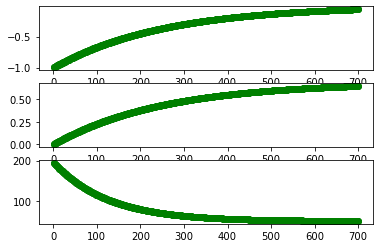

In [28]:
plt.subplot(311)
plt.plot(index, beta0_history,'go')
plt.subplot(312)
plt.plot(index, beta1_history,'go')
plt.subplot(313)
plt.plot(index, loss_history,'go')

#Plots iterations that converge to the real values of Beta0 and Beta1

In [29]:
data1

,Gold AM Fix
Date,
1968-01-02,35.18
1968-01-03,35.16
1968-01-04,35.14
1968-01-05,35.14
1968-01-08,35.14
...,...
2021-03-25,1729.20
2021-03-26,1727.85
2021-03-29,1723.95


In [30]:
Regdata = np.array(data1)

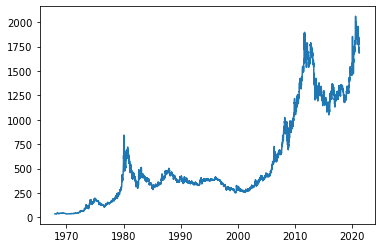

In [36]:
plt.plot(data1)